# Project: Wrangling and Analyze Data

## Import all packages

In [198]:
import numpy as np
import pandas as pd
import requests
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline
import json
import seaborn as sns
import os

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [199]:
twArchive = pd.read_csv('twitter-archive-enhanced.csv')
twArchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [200]:
twArchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [201]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url, allow_redirects=True)
response
#200 being the http status code for the request has succeeded

<Response [200]>

In [202]:
#Save tsv to file, write binary mode
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [203]:
imagePred = pd.read_csv('image-predictions.tsv', sep = '\t')
imagePred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [204]:
imagePred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [205]:
from tweepy import OAuthHandler
CONSUMER_KEY = "CONSUMER_KEY"
CONSUMER_SECRET = "CONSUMER_SECRET"
ACCESS_TOKEN = "ACCESS_TOKEN"
ACCESS_TOKEN_SECRET = "ACCESS_TOKEN_SECRET"

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [206]:
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response.content)

In [207]:
df_list = []
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    
    for line in lines:
        parsed_json = json.loads(line)
        df_list.append({'tweet_id': parsed_json['id'],
                        'favorite_count': parsed_json['favorite_count'],
                        'retweet_count': parsed_json['retweet_count']})
        
twJson = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

twJson.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [208]:
twJson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual assessment 

In [209]:
twArchive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [210]:
imagePred.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [211]:
twJson.head(10)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


## Programmatic assessement

In [212]:
twArchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [213]:
imagePred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [214]:
twJson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [215]:
twArchive[twArchive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [216]:
imagePred["jpg_url"].duplicated().sum()

66

In [217]:
twArchive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [218]:
twArchive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

### Quality issues

1. `twArchive` Remove any retweets and replies, just want tweets of dog_rates account


2. `twArchive` Delete unnecessary columns that we won't use it.


3. `twArchive` *timestamp* datatype should be datetime.


4. `twArchive` Some null values are 'None' *string* instead of NaN


5. `twArchive` some rating_denominator values are not 10


6. `imagePred` There are some images that are duplicated (66 images)


7. `twArchive` Some rows don't have expanded_urls so the tweet is without picture


8. `imagePred` in p1, p2 and p3: stabilize capitalization and remove underscores


### Tidiness issues

1. `twArchive` *doggo, floofer, pupper* and *puppo* variables are unique columns and should be combined into one column.


2. Merge these three dataframes: `twArchive`, `imagePred`, and `twJson` into one dataframe based on 'tweet_id'.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [219]:
# Make copies of original pieces of data
twArchive_clean = twArchive.copy()
imagePred_clean = imagePred.copy()
twJson_clean = twJson.copy()

### Issue #1

#### Quality
My goal here is remove any retweets and replies, just want tweets of dog_rates account by using isnull function one time to remove all the retweets (retweeted_status_id), and second one to remove all the replies (in_reply_to_status_id).

#### Code

In [220]:
twArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [221]:
twArchive_clean = twArchive_clean[twArchive_clean.retweeted_status_id.isnull()]
twArchive_clean = twArchive_clean[twArchive_clean.in_reply_to_status_id.isnull()]

#### Test

In [222]:
twArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Issue #2

#### Quality: 
Delete unnecessary columns that we won't use it like: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and source. most of them are columns connected to a retweet but I want to focus on tweets only. 

#### Code

In [223]:
twArchive_clean = twArchive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                        'retweeted_status_user_id', 'retweeted_status_timestamp', 'source'], 1)
twArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


#### Test

In [224]:
twArchive_clean.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


### Issue #3

### Tidiness
doggo, floofer, pupper and puppo variables are unique columns and i'll combine them into one column by melting the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column and then droping them.

#### Code

In [225]:
twArchive_clean = pd.melt(twArchive_clean, 
                                id_vars = ['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                                var_name = 'dog_type', 
                                value_name = 'dog_stage')

In [226]:
twArchive_clean.drop('dog_type', 1, inplace = True)

In [227]:
twArchive_clean = twArchive_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

#### Test

In [228]:
twArchive_clean.sample(3)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2496,811985624773361665,2016-12-22 17:23:53 +0000,Say hello to Ted. He accidentally opened the front facing camera. 11/10 h*ckin unpupared https://t.co/sIB5C6FDop,https://twitter.com/dog_rates/status/811985624773361665/photo/1,11,10,Ted,None
3947,670676092097810432,2015-11-28 18:50:15 +0000,This is Bloo. He's a Westminster Cîroc. Doesn't think Bart deserves legs. Nice flowers. 8/10 https://t.co/IAc1QCczMc,https://twitter.com/dog_rates/status/670676092097810432/photo/1,8,10,Bloo,None
2055,666701168228331520,2015-11-17 19:35:19 +0000,This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall. 8/10 would hug softly https://t.co/uQbZJM2DQB,https://twitter.com/dog_rates/status/666701168228331520/photo/1,8,10,a,None


In [229]:
twArchive_clean['dog_stage'].value_counts()

None       1761
pupper     230 
doggo      72  
puppo      24  
floofer    10  
Name: dog_stage, dtype: int64

### Issue #4

#### Quality: 

timestamp datatype is object (string) and should be datetime, +0000 will be fixed when changing datatype to datetime.

#### Code

In [230]:
twArchive_clean['timestamp'] = pd.to_datetime(twArchive_clean['timestamp'])

#### Test

In [231]:
twArchive_clean['timestamp'].head()

2021   2015-11-19 18:13:27
2020   2015-11-19 20:14:03
2019   2015-11-19 20:20:22
2018   2015-11-19 20:44:47
2017   2015-11-19 21:22:56
Name: timestamp, dtype: datetime64[ns]

### Issue #5

#### Quality: 
Some null values are 'None' *string* instead of NaN, so I'll use df.replace(np.nan) in pandas 

#### Code

In [232]:
twArchive_clean.replace('None', np.NaN, inplace = True)

#### Test

In [233]:
twArchive_clean.sample(4)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
3316,696754882863349760,2016-02-08 17:58:03,This is Reptar. He specifically asked for his skis to have four bindings. He's not happy. Quite perturbed tbh. 10/10 https://t.co/l9k7TPP7Tp,https://twitter.com/dog_rates/status/696754882863349760/photo/1,10,10,Reptar,NaN
4883,759793422261743616,2016-07-31 16:50:42,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,pupper
5852,674447403907457024,2015-12-09 04:36:06,This pupper just wants a belly rub. This pupper has nothing to do w the tree being sideways now. 10/10 good pupper https://t.co/AyJ7Ohk71f,https://twitter.com/dog_rates/status/674447403907457024/photo/1,10,10,NaN,pupper
3093,715220193576927233,2016-03-30 16:52:36,This is Nico. His selfie game is strong af. Excellent use of a sneaky tongue slip. 10/10 star material https://t.co/1OBdJkMOFx,https://twitter.com/dog_rates/status/715220193576927233/photo/1,10,10,Nico,NaN


### Issue #6

#### Quality:  
some rating_denominator values are not 10, and the rating_denominator is almost always 10


#### Code

In [234]:
twArchive_clean.rating_denominator.value_counts()

10     2080
50     3   
11     2   
80     2   
7      1   
170    1   
150    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
2      1   
Name: rating_denominator, dtype: int64

In [235]:
pd.set_option('display.max_colwidth', -1)
twArchive_clean_10 = twArchive_clean.query('rating_denominator != 10')
twArchive_clean_10

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2076,666287406224695296,2015-11-16 16:11:11,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,NaN
3307,697463031882764288,2016-02-10 16:51:59,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44,40,NaN,NaN
3496,684222868335505415,2016-01-05 04:00:18,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121,110,NaN,NaN
3523,682962037429899265,2016-01-01 16:30:13,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,NaN
3133,710658690886586372,2016-03-18 02:46:49,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,NaN,NaN
3108,713900603437621249,2016-03-27 01:29:02,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,NaN,NaN
3153,709198395643068416,2016-03-14 02:04:08,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,NaN,NaN
3045,722974582966214656,2016-04-21 02:25:47,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,NaN,NaN
3082,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,NaN
3226,704054845121142784,2016-02-28 21:25:30,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,a,NaN


In [236]:
#not from twitter
twArchive_clean.loc[twArchive_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 9
twArchive_clean.loc[twArchive_clean.tweet_id == 666287406224695296, 'rating_denominator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 697463031882764288, 'rating_numerator'] = 12
twArchive_clean.loc[twArchive_clean.tweet_id == 697463031882764288, 'rating_denominator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 704054845121142784, 'rating_numerator'] = 12
twArchive_clean.loc[twArchive_clean.tweet_id == 704054845121142784, 'rating_denominator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 684225744407494656, 'rating_numerator'] = 11
twArchive_clean.loc[twArchive_clean.tweet_id == 684225744407494656, 'rating_denominator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 684222868335505415, 'rating_numerator'] = 11
twArchive_clean.loc[twArchive_clean.tweet_id == 684222868335505415, 'rating_denominator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 722974582966214656, 'rating_numerator'] = 13
twArchive_clean.loc[twArchive_clean.tweet_id == 722974582966214656, 'rating_denominator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 716439118184652801, 'rating_numerator'] = 11
twArchive_clean.loc[twArchive_clean.tweet_id == 716439118184652801, 'rating_denominator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14
twArchive_clean.loc[twArchive_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 731156023742988288, 'rating_numerator'] = 15
twArchive_clean.loc[twArchive_clean.tweet_id == 731156023742988288, 'rating_denominator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 713900603437621249, 'rating_numerator'] = 11
twArchive_clean.loc[twArchive_clean.tweet_id == 713900603437621249, 'rating_denominator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 709198395643068416, 'rating_numerator'] = 9
twArchive_clean.loc[twArchive_clean.tweet_id == 709198395643068416, 'rating_denominator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 710658690886586372, 'rating_numerator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 710658690886586372, 'rating_denominator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 682962037429899265, 'rating_numerator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 682962037429899265, 'rating_denominator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 677716515794329600, 'rating_numerator'] = 12
twArchive_clean.loc[twArchive_clean.tweet_id == 677716515794329600, 'rating_denominator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 675853064436391936, 'rating_numerator'] = 11
twArchive_clean.loc[twArchive_clean.tweet_id == 675853064436391936, 'rating_denominator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 810984652412424192, 'rating_numerator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 810984652412424192, 'rating_denominator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 820690176645140481, 'rating_numerator'] = 12
twArchive_clean.loc[twArchive_clean.tweet_id == 820690176645140481, 'rating_denominator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 835246439529840640, 'rating_numerator'] = 13
twArchive_clean.loc[twArchive_clean.tweet_id == 835246439529840640, 'rating_denominator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 775096608509886464, 'rating_numerator'] = 14
twArchive_clean.loc[twArchive_clean.tweet_id == 775096608509886464, 'rating_denominator'] = 10
twArchive_clean.loc[twArchive_clean.tweet_id == 758467244762497024, 'rating_numerator'] = 12
twArchive_clean.loc[twArchive_clean.tweet_id == 758467244762497024, 'rating_denominator'] = 10

#### Test

In [237]:
twArchive_clean.query('rating_denominator != 10')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [238]:
twArchive_clean.rating_denominator.value_counts()

10    2097
Name: rating_denominator, dtype: int64

### Issue #7

#### Quality:

In the observation step I found out that there are some images that are duplicated, which are 66 images and i'll delete the duplicated ones.

#### Code

In [239]:
imagePred_clean["jpg_url"].duplicated().sum()

66

In [240]:
imagePred_clean = imagePred_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [241]:
imagePred_clean["jpg_url"].duplicated().sum()

0

### Issue #8

#### Quality:

I have found that if tweet doesn't have expanded_urls then it doesn't have picture, so i'll drop every tweet that not have expanded_urls.

In [242]:
twArchive_clean[twArchive_clean['expanded_urls'].isnull()]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2635,785515384317313025,2016-10-10 16:20:36,"Today, 10/10, should be National Dog Rates Day",NaN,10,10,NaN,NaN
2392,828361771580813312,2017-02-05 21:56:51,Beebop and Doobert should start a band 12/10 would listen,NaN,12,10,NaN,NaN
5416,696518437233913856,2016-02-08 02:18:30,Oh my god 10/10 for every little hot dog pupper,NaN,10,10,NaN,pupper


In [243]:
twArchive_clean = twArchive_clean[~twArchive_clean['expanded_urls'].isnull()]
twArchive_clean[twArchive_clean['expanded_urls'].isnull()]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### Issue #9

#### Quality:

p1, p2 and p3 columns are not consistent, so my goal here is to stabilize capitalization and remove underscores.

#### Code

In [244]:
imagePred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [245]:
#for the underscores
imagePred_clean['p1'] = imagePred_clean['p1'].str.replace('_', ' ')
imagePred_clean['p2'] = imagePred_clean['p2'].str.replace('_', ' ')
imagePred_clean['p3'] = imagePred_clean['p3'].str.replace('_', ' ')

In [246]:
#to normalize capitalization
imagePred_clean['p1'] = imagePred_clean['p1'].str.title()
imagePred_clean['p2'] = imagePred_clean['p2'].str.title()
imagePred_clean['p3'] = imagePred_clean['p3'].str.title()

#### Test

In [247]:
imagePred_clean.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1095,720043174954147842,https://pbs.twimg.com/media/Cf4bcm8XEAAX4xV.jpg,1,Samoyed,0.954517,True,Eskimo Dog,0.029130,True,White Wolf,0.004462,False
1145,730427201120833536,https://pbs.twimg.com/media/CiL_qh0W0AAu5VA.jpg,1,Eskimo Dog,0.682082,True,Siberian Husky,0.289288,True,Staffordshire Bullterrier,0.008771,True
1967,867900495410671616,https://pbs.twimg.com/media/DAtm5MkXoAA4R6P.jpg,1,Labrador Retriever,0.522644,True,Kuvasz,0.332461,True,Dalmatian,0.032008,True
335,672205392827572224,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,1,Carton,0.952613,False,Crate,0.035376,False,Pug,0.003267,True


### Issue #10

### Tidiness:

And finally, I'm going to merge all these three dataframes: `twArchive`, `imagePred`, and `twJson` into one dataframe based on 'tweet_id' by using pd.merge object, the name of this dataframe will be `tweets`.

#### Code

In [248]:
tweets1 = pd.merge(twArchive_clean, imagePred_clean, how = 'inner', on = ['tweet_id'])

In [249]:
tweets = pd.merge(tweets1, twJson_clean, how = 'inner', on = ['tweet_id'])

In [250]:
tweets.head(3)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,667405339315146752,2015-11-19 18:13:27,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,NaN,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,...,0.381377,True,Leonberg,0.127998,True,Golden Retriever,0.069357,True,489,234
1,667435689202614272,2015-11-19 20:14:03,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,NaN,NaN,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,...,0.999091,True,Miniature Pinscher,0.000450,True,Black-And-Tan Coonhound,0.000157,True,326,89
2,667437278097252352,2015-11-19 20:20:22,Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10,10,NaN,NaN,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,...,0.989154,False,Bath Towel,0.006300,False,Badger,0.000966,False,483,257


In [251]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1905 entries, 0 to 1904
Data columns (total 21 columns):
tweet_id              1905 non-null int64
timestamp             1905 non-null datetime64[ns]
text                  1905 non-null object
expanded_urls         1905 non-null object
rating_numerator      1905 non-null int64
rating_denominator    1905 non-null int64
name                  1398 non-null object
dog_stage             292 non-null object
jpg_url               1905 non-null object
img_num               1905 non-null int64
p1                    1905 non-null object
p1_conf               1905 non-null float64
p1_dog                1905 non-null bool
p2                    1905 non-null object
p2_conf               1905 non-null float64
p2_dog                1905 non-null bool
p3                    1905 non-null object
p3_conf               1905 non-null float64
p3_dog                1905 non-null bool
favorite_count        1905 non-null int64
retweet_count         1905 non-nul

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [252]:
tweets.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
#### In this section, Im going to provide three insights and three visualizations of each insight.

## Insight 1: The correlation between favorites and retweets

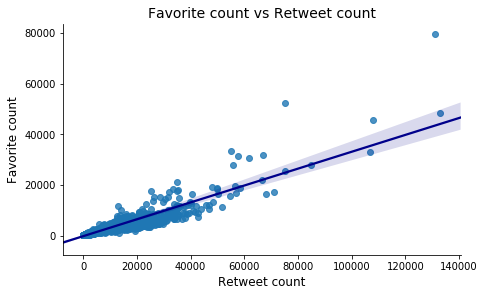

In [253]:
sns.lmplot(x= "favorite_count", y= "retweet_count", data= tweets, size = 4, aspect=1.7,line_kws={'color': 'darkblue'});
ax = plt.gca()
plt.title('Favorite count vs Retweet count', size=14);
plt.xlabel('Retweet count', size=12);
plt.ylabel('Favorite count', size=12);

#### In this graph we can notice that Favorites are positively correlated Retweets, so it has a positive correlation.

## Insight 2: Most common dog stage

In [254]:
tweets.dog_stage.value_counts()

pupper     203
doggo      59 
puppo      22 
floofer    8  
Name: dog_stage, dtype: int64

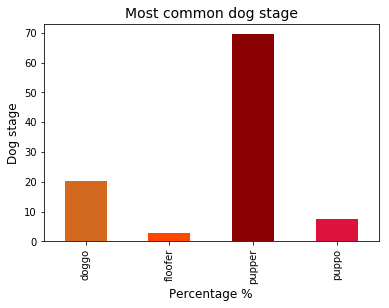

In [255]:
dogstages = (tweets.groupby('dog_stage').size() / tweets.groupby('dog_stage').size().sum())*100

dogstages.plot.bar(color= ['chocolate', 'orangered','darkred', 'crimson'])

plt.title('Most common dog stage', size=14)
plt.ylabel("Dog stage", size=12)  
plt.xlabel("Percentage %", size=12)  
plt.show()

#### This bar chart shows us that 69% of dogs in those tweets are *pupper*, so pupper is the most common stage among those tweets, doggo comes next, then puppo, and the least common stage is floofer.

## Insight 3: Most used ratings

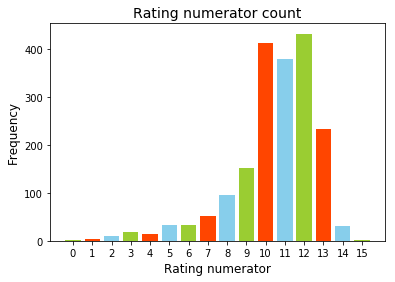

In [256]:
ratingCount = tweets[tweets.rating_numerator <= 15].groupby(['rating_numerator']).count()['tweet_id']
plt.bar(np.arange(16), ratingCount, color= ['yellowgreen', 'orangered','skyblue'])
plt.xticks(np.arange(16))
plt.title('Rating numerator count', size=14)
plt.xlabel('Rating numerator', size=12)
plt.ylabel('Frequency', size=12)
plt.show();

#### This bar showsus that the most used rating is 12, and most of the tweets are rated between 10 and 13.

## Insight 4: Most common dog breed

Text(0,0.5,'Frequency')

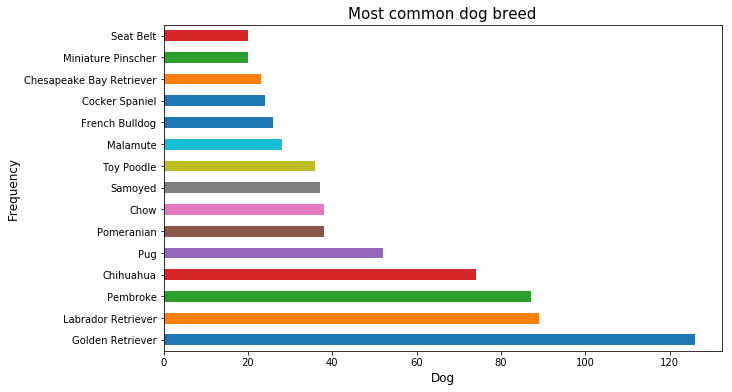

In [257]:
breeds = tweets['p1'].value_counts().sort_values(ascending=False)[:15]
breeds.plot(kind = 'barh',figsize=(10,6))

plt.title('Most common dog breed', size=15)
plt.xlabel('Dog', size=12)
plt.ylabel('Frequency', size=12)

#### In this graph we can see that Golden Retriever is the most common dog breed, 2nd: Labrador Retriever, 3rd: Pembroke.

# References:

https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

https://stackoverflow.com/questions/20044743/twitter-api-get-tweet-id

https://matplotlib.org/3.1.0/gallery/color/named_colors.html

https://stackoverflow.com/questions/56704332/trying-to-make-a-barchart-bar-missing-1-required-positional-argument-height